In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *

#----------------------------------
# Read data
#----------------------------------

v_grid  = np.loadtxt('./data_v3/v_grid.txt')
CCF     = np.loadtxt('./data_v3/CCF.txt')
σCCF   = np.loadtxt('./data_v3/σCCF.txt')
bjd     = np.loadtxt('./data_v3/bjd.txt')
rv      = np.loadtxt('./data_v3/rv.txt')
σrv     = np.loadtxt('./data_v3/σrv.txt')


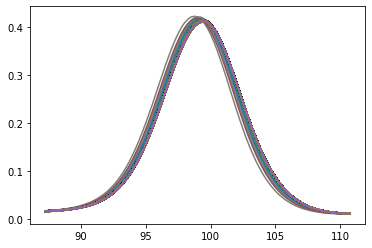

In [2]:
plt.plot(v_grid, CCF)
plt.show()

In [3]:
#==============================================================================
# Feed CCFs into FIESTA
#==============================================================================
df, shift_spectrum, err_shift_spectrum, power_spectrum, err_power_spectrum, RV_gauss = FIESTA(v_grid, CCF, σCCF, k_max=6)
shift_spectrum      *= 1000
err_shift_spectrum  *= 1000
RV_gauss            *= 1000
shift_function      = np.zeros(shift_spectrum.shape)

for i in range(shift_spectrum.shape[0]):
    shift_function[i,:] = shift_spectrum[i,:] - RV_gauss # look back; change rv_raw_daily




Velocity grid used [87.25, 110.75]

ξ_normal = 1.35


The median SNR of all CCFs is 6999
ξ_modelling_noise = 1.43


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 0.13

In summary, the cut-off frequency for FIESTA is recommended to be 0.13 (3 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000         15788.2      28.3       0.0          0.13785   
1   0.042         10015.4      11.0    1097.6          0.04947   
2   0.084          3733.3       5.3      14.9          0.01207   
3   0.126           920.5       2.9      92.8          0.00240   
4   0.168           182.3       1.4       1.7          0.00053   
5   0.211            13.8       1.0      41.4          0.00050   
6   0.253            18.8       1.0       0.9          0.00044   
7   0.295            12.6       0.9       0.8          0.00041   
8   0.337            11.5       0.8       0.8          0.00038   
9   0.379            10.1       0.7       0.7        

In [4]:
np.savetxt('./data_v3/RV_gauss.txt', RV_gauss)

In [5]:
#----------------------------------
# Plot the RVs 
#----------------------------------

def plot_rv(date1, date2):
    plt.rcParams.update({'font.size': 14})
    alpha   = 0.3
    colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                  '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']

    idx_bjd = (bjd>date1) & (bjd<date2+1)

    fig, axes = plt.subplots(figsize=(15, 3))
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.errorbar(bjd[idx_bjd]-2400000, rv[idx_bjd]-np.mean(rv[idx_bjd]), σrv[idx_bjd], c='red', marker='.', ls='none', alpha=alpha, label='rv')
    plt.errorbar(bjd[idx_bjd]-2400000, RV_gauss[idx_bjd]-np.mean(RV_gauss[idx_bjd]), σrv[idx_bjd], c='blue', marker='.', ls='none', alpha=alpha, label='RV_gauss')
    plt.legend()
    plt.xlabel('BJD - 2400000 [d]')
    plt.ylabel('RV [m/s]')

    if date1 == date2:
        filename = '%d.%d.%d' %(tuple(pyasl.daycnv(date1))[:3])
        plt.title('%d.%d.%d' %tuple(pyasl.daycnv(date1))[:3])
    else:
        filename = '%d.%d.%d-%d.%d.%d' %(tuple(pyasl.daycnv(date1))[:3]+tuple(pyasl.daycnv(date2))[:3])
        plt.title(filename)
    plt.savefig('./figure/' + filename+'.png')
    plt.show()


### RVs

In [6]:
import pandas as pd
quality_df  = pd.read_csv('combined_rvs_1.csv')
df  = pd.read_csv('combined_rvs_1.csv')
df_daily = pd.read_csv('summary_1.csv')
bjd_daily = df_daily['obs_date.mean_bjd']

rv_by_order = quality_df.iloc[:,75::2].values
σrv_by_order = quality_df.iloc[:,76::2].values
rv_drp = quality_df['rv_drp']*1000
rv_template = quality_df['rv_template']

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=1)
    # Fast and numerically precise:
    variance = np.average(((np.subtract(values.T,average))**2).T, weights=weights, axis=1)
    return (average, np.sqrt(variance))

ave, rms_by_obs = weighted_avg_and_std(values=rv_by_order, weights=1/σrv_by_order**2)



rv statistics by order 

In [7]:
quality_df.iloc[:,75::2]

,rv_118_template,rv_117_template,rv_116_template,rv_115_template,rv_114_template,rv_113_template,rv_112_template,rv_111_template,rv_110_template,rv_109_template,...,rv_75_template,rv_74_template,rv_73_template,rv_72_template,rv_71_template,rv_70_template,rv_69_template,rv_68_template,rv_67_template,rv_66_template
0,2.444798,2.095322,1.983975,0.885195,-0.425061,-1.681060,1.337408,-0.630409,1.919737,0.809776,...,-19.429743,72.246008,4.891834,11.148522,-2.771714,-3.916532,24.334078,432.699675,216.315111,13.146319
1,0.678488,-0.886643,1.943406,-1.246889,1.632461,-1.632204,3.198932,2.343155,3.170717,0.677256,...,-18.222135,76.978284,5.575195,4.753764,1.064844,-1.209226,17.365704,427.682586,215.050010,-4.256677
2,2.063642,3.464100,3.844078,0.359564,2.112433,0.213279,0.297063,-0.155291,3.026023,0.817813,...,-10.538474,74.388905,3.534743,6.564870,-4.883243,-2.864963,21.570622,430.879712,214.407489,19.600785
3,2.444525,2.425561,3.080984,-1.841276,2.198104,-1.765950,-0.536725,0.984338,2.519127,1.630862,...,-11.042435,70.295597,-7.267635,6.528081,-0.383924,-6.387522,20.366616,413.563071,210.500524,2.182041
4,3.071197,3.700619,4.461594,0.580890,1.255166,-1.354114,3.352516,2.577543,0.483224,1.124395,...,-14.890027,70.143674,4.028416,11.572008,-9.474970,5.432755,12.357777,425.501613,230.104953,28.319470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31790,-1.581925,-0.728409,3.483050,1.683762,1.578762,-0.101025,-2.911253,0.849951,2.405815,-0.306840,...,2.005919,48.436508,-9.590668,5.485136,-3.511804,0.965429,5.405446,25.599717,49.967514,-15.574133
31791,-4.145061,-1.288039,3.423662,-0.717308,-1.881259,-1.886879,-0.144262,1.620865,0.617575,-0.148680,...,-3.641873,40.584395,-2.939348,7.996783,-4.519353,-2.651319,9.815030,25.465080,53.666674,-14.676646
31792,-3.791221,0.404266,4.354047,-0.102863,2.945554,-1.631997,-2.752744,1.593665,0.965540,2.847214,...,-5.532700,51.639379,-15.233149,6.437553,-9.757902,-0.025133,8.968138,24.253735,36.690043,-24.592993
31793,-2.119480,0.616914,3.869027,2.605457,3.296566,-1.069155,-3.451019,1.235927,4.949077,-1.091067,...,-0.524094,51.270379,-15.109137,3.318728,-4.639564,0.941786,3.322695,28.528754,49.531334,-8.995977


In [8]:
quality_df.columns

Index(['CaIIHK', 'CaIRT1', 'CaIRT2', 'CaIRT3', 'CaI_1', 'CaI_2', 'Filename',
       'Ha06_1', 'Ha06_2', 'Ha16_1',
       ...
       'rv_70_template', 'σrv_70_template', 'rv_69_template',
       'σrv_69_template', 'rv_68_template', 'σrv_68_template',
       'rv_67_template', 'σrv_67_template', 'rv_66_template',
       'σrv_66_template'],
      dtype='object', length=163)

### exclude bad observations (days)

#### reject rvs lie outside 1-sigma rv

In [9]:
def weighted_avg_and_std2(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

_, rv_drp_std = weighted_avg_and_std2(rv_drp, 1/σrv**2)

In [10]:
rv_drp_median = np.median(rv_drp)
idx_rej_1sigma = abs(rv_drp-np.median(rv_drp)) > (2*rv_drp_std)
sum(idx_rej_1sigma)

101

#### reject rvs on user-defined dates

In [11]:
dates_to_exclude = [datetime(2021, 6, 4), datetime(2021, 6, 16), datetime(2021, 7, 9), datetime(2021, 7, 10), datetime(2021, 7, 18), datetime(2021, 7, 19)]

idx_rej_bjd = np.zeros(bjd.shape, dtype=bool)

# use pyasl.jdcnv(date)+1 to translate to the corresponding bjd
for date in dates_to_exclude:
    idx = (abs(bjd-pyasl.jdcnv(date)-1)<0.5)
    idx_rej_bjd = idx_rej_bjd | idx
    print(sum(idx))
    
sum(idx_rej_bjd)

82
89
22
191
25
9


418

#### reject days with few observations (<10)

In [12]:
idx_rej_fewobs = np.zeros(bjd.shape, dtype=bool)
obs_date = df_daily['obs_date.string']

for i in range(len(obs_date)):
    if df_daily['num_rvs.good'][i] < 10:
        date = datetime(int(obs_date[i][0:4]), int(obs_date[i][5:7]), int(obs_date[i][8:10]))
        idx = (abs(bjd-pyasl.jdcnv(date)-1)<0.5)
        idx_rej_fewobs = idx_rej_fewobs | idx
#         print(sum(idx))
sum(idx_rej_fewobs)

225

#### only use 59260< bjd-2400000 < 59500

In [13]:
idx_rej_bjd2 = ((bjd-2400000)> 59500) | ((bjd-2400000)<59260)
sum(idx_rej_bjd2)

13206

#### all rejects

In [14]:
idx_rej = idx_rej_1sigma | idx_rej_bjd | idx_rej_fewobs #| idx_rej_bjd2
# idx_rej = idx_rej_bjd | idx_rej_fewobs #| idx_rej_bjd2
len(idx_rej), sum(idx_rej)

(31795, 650)

In [15]:
if 0:
    fig, axes = plt.subplots(figsize=(15, 3))
    alpha=0.05

    plt.plot(bjd-2400000, rv_drp-rv_drp[0], '.', label='rv_drp', alpha=alpha)
    # plt.plot(bjd-2400000, rv_template-rv_template[0], '.', label='rv_template', alpha=alpha)
    plt.plot(bjd-2400000, RV_gauss-RV_gauss[0], '.', label='RV_gauss', alpha=alpha)

    plt.legend()
    plt.xlabel('BJD - 2400000 [d]')
    plt.ylabel('m/s')
    plt.ylim(-25,5)
    plt.show()

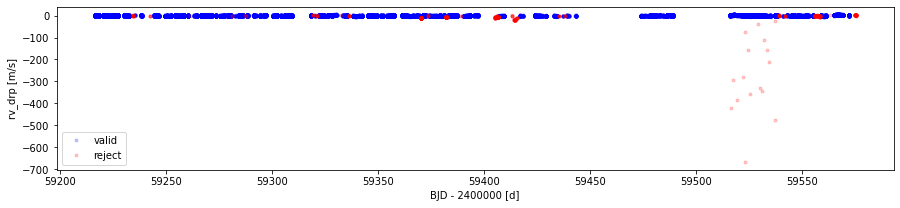

In [16]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.2
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, 'b.', label='valid', alpha=alpha)
plt.plot(bjd[idx_rej]-2400000, rv_drp[idx_rej]-rv_drp_median, 'r.', label='reject', alpha=alpha)
plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv_drp [m/s]')
plt.show()

zoom in y-axis

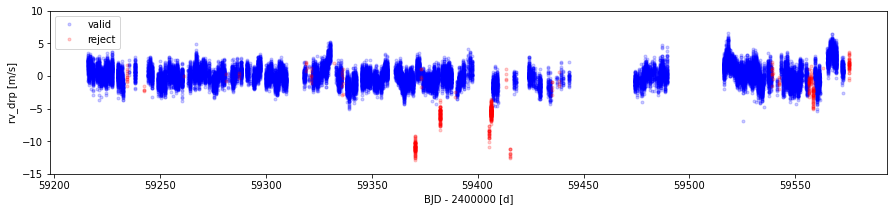

In [17]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.2
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, 'b.', label='valid', alpha=alpha)
plt.plot(bjd[idx_rej]-2400000, rv_drp[idx_rej]-rv_drp_median, 'r.', label='reject', alpha=alpha)
plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv_drp [m/s]')
plt.ylim(-15,10)
plt.show()

zoom in x-axis

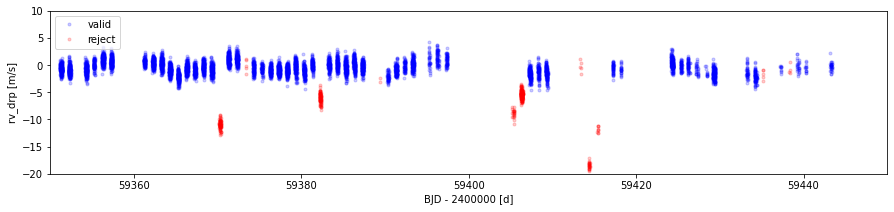

In [18]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.2
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, 'b.', label='valid', alpha=alpha)
plt.plot(bjd[idx_rej]-2400000, rv_drp[idx_rej]-rv_drp_median, 'r.', label='reject', alpha=alpha)
# plt.plot(bjd-2400000, (df['CaIIHK']-np.mean(df['CaIIHK']))*5000+10, 'k.', label='CaIIHK', alpha=alpha)
plt.legend(loc=2)
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv_drp [m/s]')
plt.xlim(59350,59450)
# plt.xlim(59550,59680)
plt.ylim(-20,10)
plt.show()

## Plots 

In [19]:

def plot_all(k_mode, t, rv, erv, ind, eind, ts_xlabel, rv_xlabel, pe_xlabel, ind_yalbel, file_name):

	'''
	e.g. 
		k_mode 		= 11
		t 			= bjd_daily
		rv 			= rv_daily
		erv 		= erv_daily
		ind 		= shift_function
		eind 	 	= err_shift_spectrum
		ts_xlabel 	= 'BJD - 2400000 [d]'
		rv_xlabel 	= '$RV_{HARPS}$'
		pe_xlabel 	= 'Period [days]'
		ind_yalbel	= 'A'
		file_name 	= 'time-series_and_shift_correlation.png'

	'''

	def new_periodogram(x, y, dy, height_ratio=0.4, plot_min_t=1.5, max_f=1, spp=100):
	
		from scipy.signal import find_peaks
		from astropy.timeseries import LombScargle

		time_span = (max(x) - min(x))
		min_f   = 1/time_span

		frequency, power = LombScargle(x, y, dy).autopower(minimum_frequency=min_f,
													   maximum_frequency=max_f,
													   samples_per_peak=spp)

		plot_x = 1/frequency
		idxx = (plot_x>plot_min_t) & (plot_x<time_span/2)
		height = max(power[idxx])*height_ratio
		ax.plot(plot_x[idxx], power[idxx], 'k-', alpha=0.5)
		peaks, _ = find_peaks(power[idxx], height=height)
		ax.plot(plot_x[idxx][peaks], power[idxx][peaks], "ro")

		for n in range(len(plot_x[idxx][peaks])):
			ax.text(plot_x[idxx][peaks][n], power[idxx][peaks][n], '%.1f' % plot_x[idxx][peaks][n], fontsize=10)

		ax.set_xlim([plot_min_t,time_span/2])
		ax.set_ylim([0, 1.2*max(power[idxx])])

		ax.set_xscale('log')


	from sklearn.linear_model import LinearRegression

	# set up the plotting configureations
	alpha1, alpha2 = [0.5,0.2]
	widths 	= [7,1,7]
	heights = [1]*(k_mode+1)
	gs_kw 	= dict(width_ratios=widths, height_ratios=heights)
	plt.rcParams.update({'font.size': 12})
	fig6, f6_axes = plt.subplots(figsize=(16, k_mode+1), ncols=3, nrows=k_mode+1, constrained_layout=True,
	                             gridspec_kw=gs_kw)

	# plots 
	for r, row in enumerate(f6_axes):
		for c, ax in enumerate(row):	

			# time-series 
			if c==0:
				if r==0:
					ax.errorbar(t, rv-np.mean(rv), erv, marker='.', ms=5, color='black', ls='none', alpha=alpha1)
					ax.set_title('Time-series')
					ax.set_ylabel(rv_xlabel)
				else:				
					ax.errorbar(t, ind[r-1,:], eind[r-1,:],  marker='.', ms=5, color='black', ls='none', alpha=alpha1)
					ax.set_ylabel(ind_yalbel + '$_{' + str(r) + '}$')
				if r!=k_mode:
					ax.set_xticks([])
				else:
					ax.set_xlabel(ts_xlabel)

			if c==1:
				if r==0:
					reg = LinearRegression().fit(rv.reshape(-1, 1), rv.reshape(-1, 1))
					score = reg.score(rv.reshape(-1, 1), rv.reshape(-1, 1))
					adjust_R2 = 1-(1-score)*(len(t)-1)/(len(t)-1-1)
					title = r'$\bar{R}$' + r'$^2$'
					ax.set_title(title + ' = {:.2f}'.format(adjust_R2))					
					ax.plot(rv-np.mean(rv), rv-np.mean(rv), 'k.', alpha = alpha2)				
				if r>0:
					reg = LinearRegression().fit(rv.reshape(-1, 1), ind[r-1,:].reshape(-1, 1))
					score = reg.score(rv.reshape(-1, 1), ind[r-1,:].reshape(-1, 1))
					adjust_R2 = 1-(1-score)*(len(t)-1)/(len(t)-1-1)
					title = r'$\bar{R}$' + r'$^2$'
					ax.set_title(title + ' = {:.2f}'.format(adjust_R2))
					ax.plot(rv-np.mean(rv), ind[r-1,:], 'k.', alpha = alpha2)
				if r!=k_mode:
					ax.set_xticks([])
				else:
					ax.set_xlabel(rv_xlabel)
				ax.yaxis.tick_right()

			if c==2:
				if r==0:
					new_periodogram(t, rv, erv)
					ax.set_title('Periodogram')
				if r>0:
					new_periodogram(t, ind[r-1,:], eind[r-1,:])
				if r!=k_mode:
					ax.set_xticks([])
				if r==k_mode:
					ax.set_xlabel(pe_xlabel)
	if file_name !=[]:
		plt.savefig(file_name)

### amplitudes and $\Delta RV$

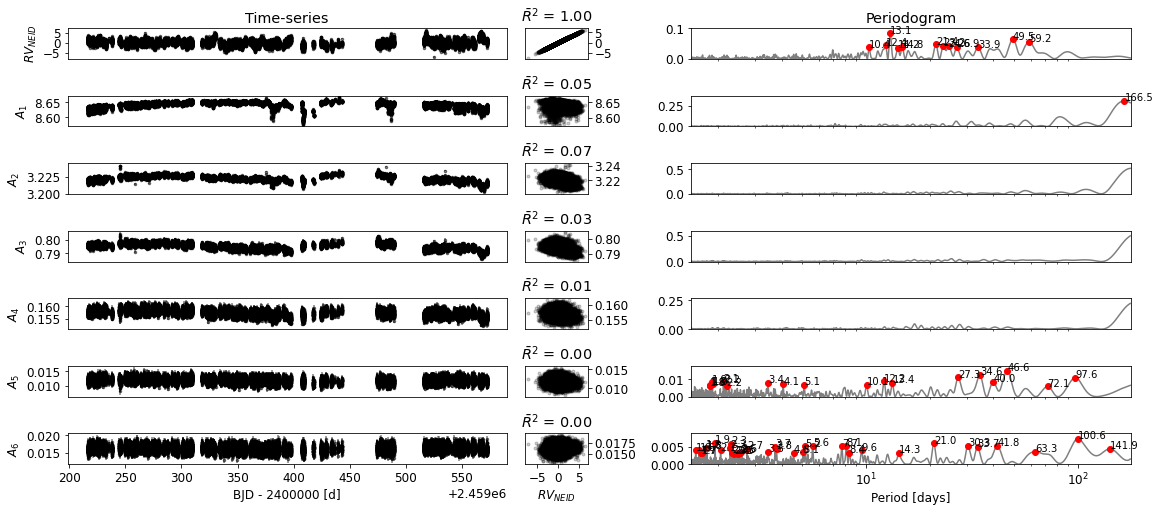

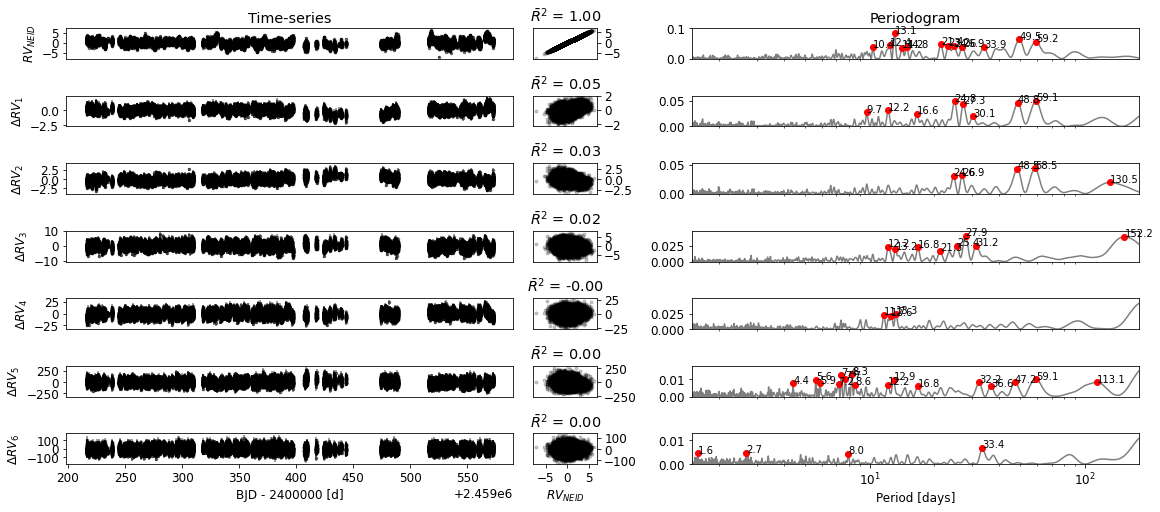

In [20]:
T1      = pyasl.jdcnv(datetime(2021, 1, 1))
T2      = pyasl.jdcnv(datetime(2021, 12, 31))
idx_bjd = (bjd>T1) & (bjd<T2+1) & (~idx_rej)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd], rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0101-1231.pdf')
plt.show()

plot_all(k_mode=6, t=bjd[idx_bjd], rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0101-1231.pdf')
plt.show()

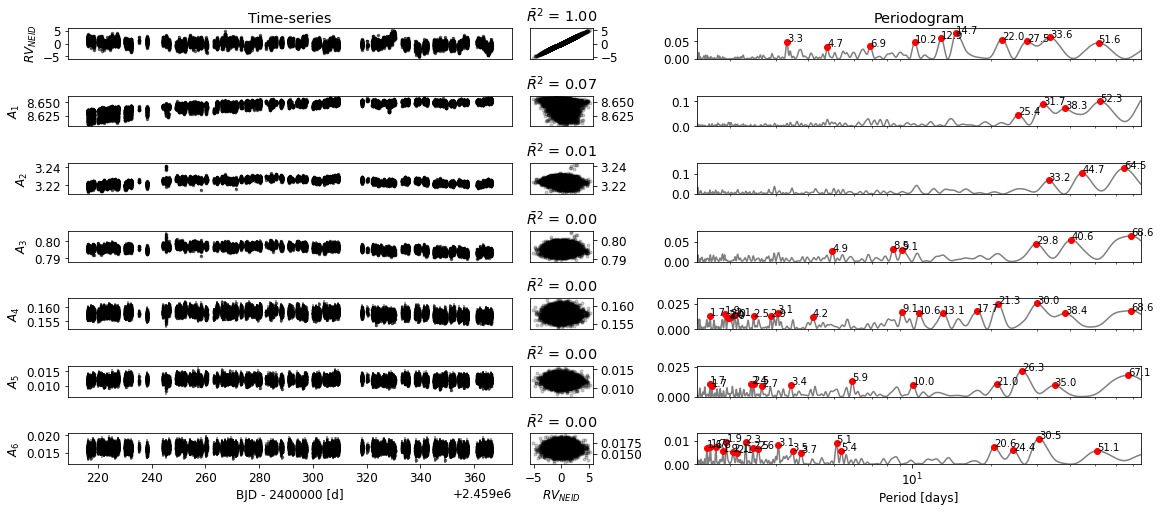

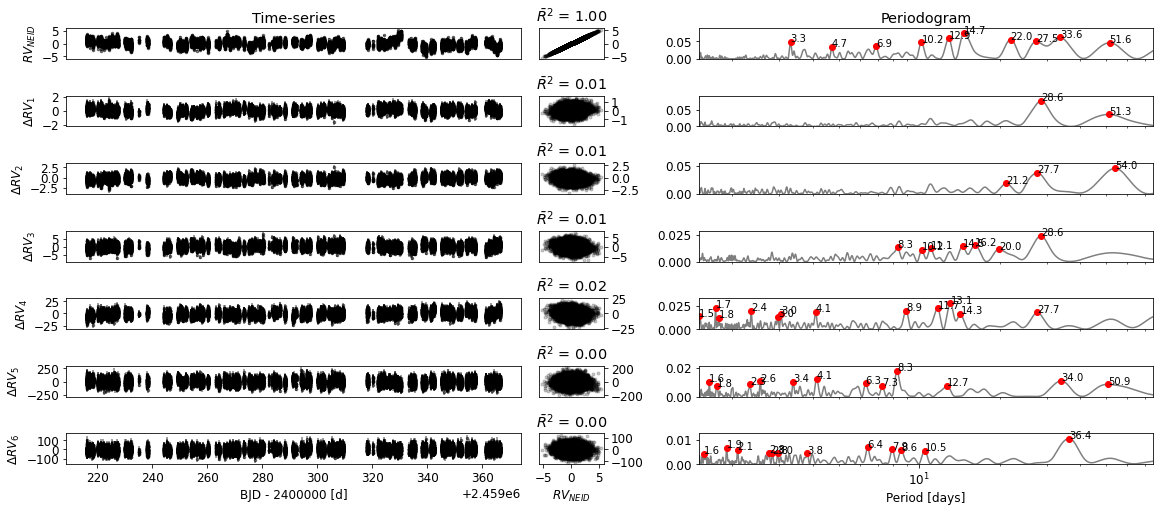

In [21]:
T1      = pyasl.jdcnv(datetime(2021, 1, 1))
T2      = pyasl.jdcnv(datetime(2021, 5, 31))
idx_bjd = (bjd>T1) & (bjd<T2+1) & (~idx_rej)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd], rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0101-0531.pdf')
plt.show()

plot_all(k_mode=6, t=bjd[idx_bjd], rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0101-0531.pdf')
plt.show()

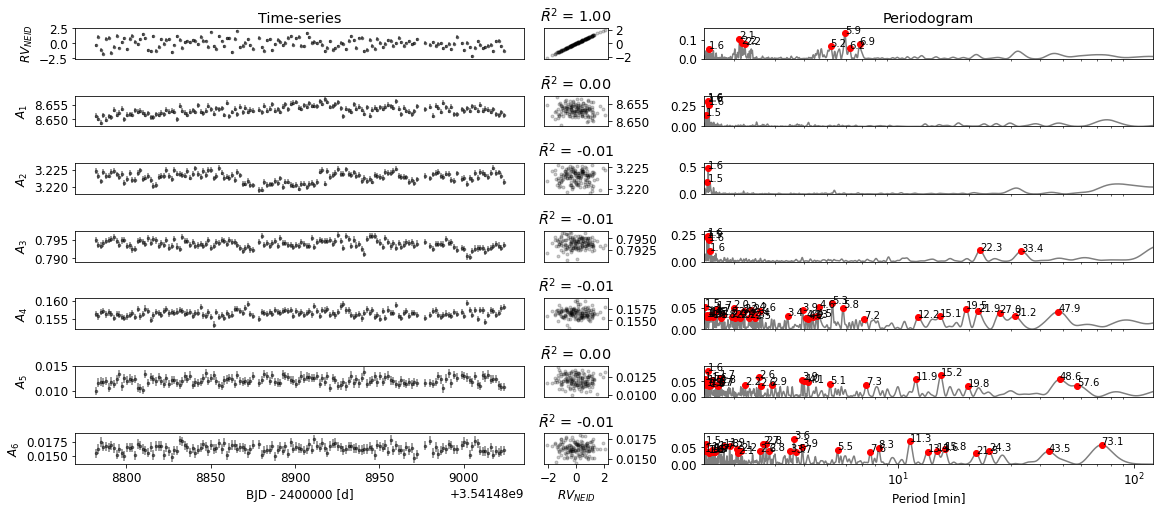

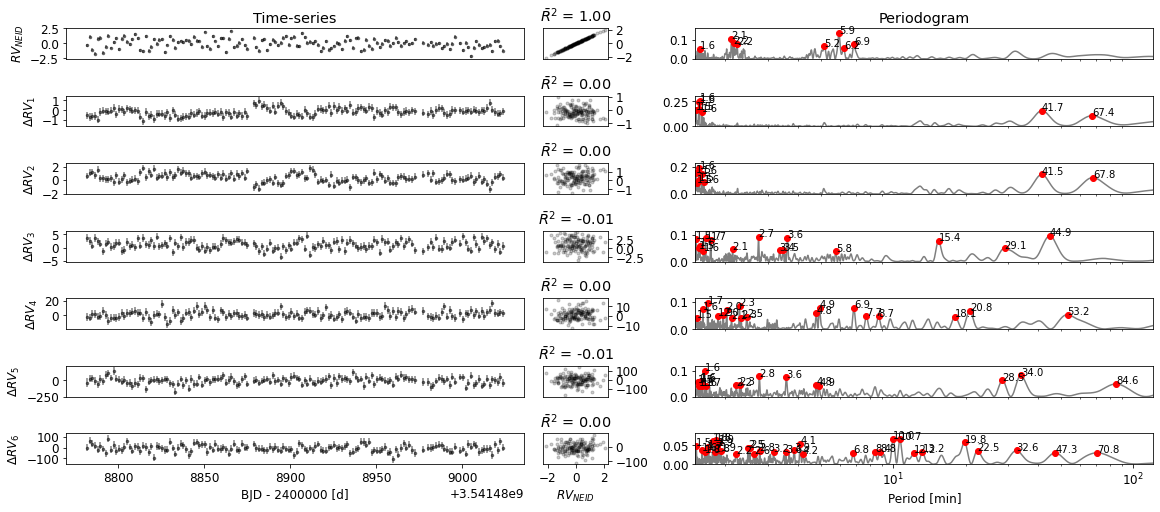

In [22]:
T1      = pyasl.jdcnv(datetime(2021, 6, 1))
T2      = pyasl.jdcnv(datetime(2021, 6, 1))
idx_bjd = (bjd>T1) & (bjd<T2+1) & (~idx_rej)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0601.pdf')

plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0601.pdf')

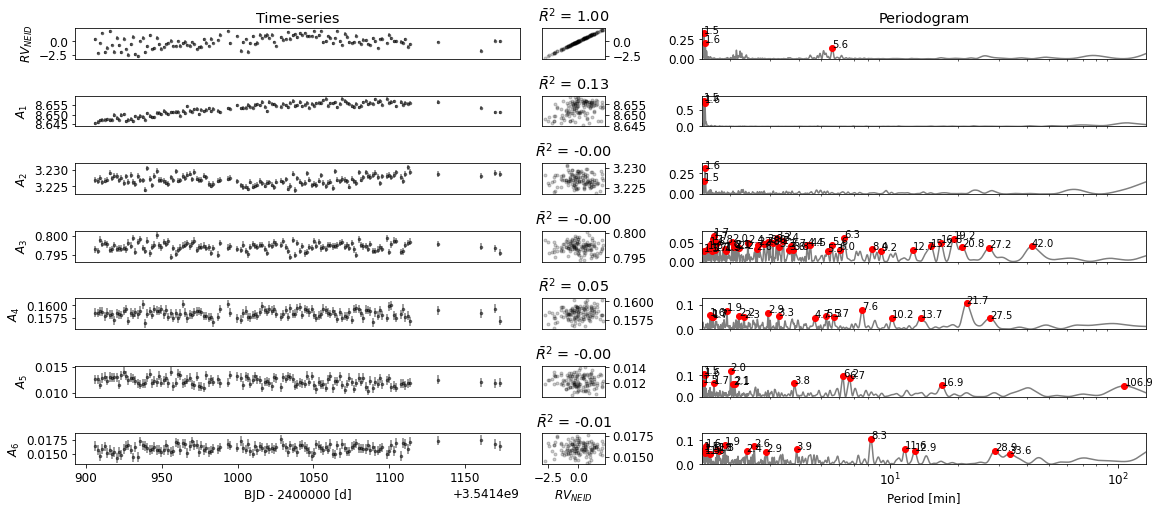

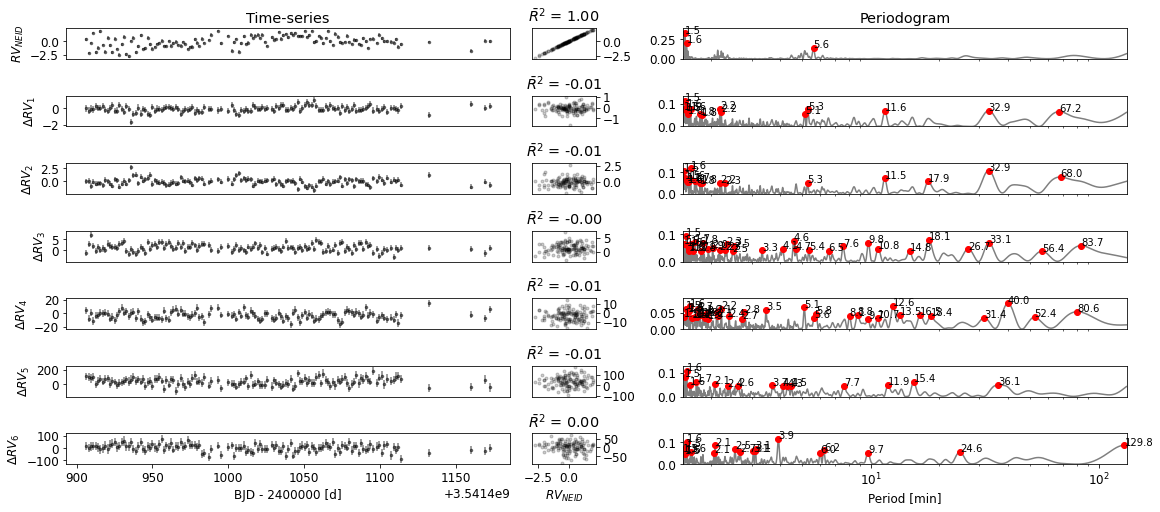

In [23]:
T1      = pyasl.jdcnv(datetime(2021, 4, 1))
T2      = pyasl.jdcnv(datetime(2021, 4, 1))
idx_bjd = (bjd>T1) & (bjd<T2+1) & (~idx_rej)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0401.pdf')

plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=RV_gauss[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0401.pdf')